# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the errors

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics

state_crime = pd.read_csv("../data/state_data.csv")

In [4]:
state_crime

,Unnamed: 0,state_name,state_initial,state_num,year,poverty_rate,unemploy_rate,justice_rate,violent_rate,property_rate,welfare_povcap,welfare_percap
0,0,Alabama,AL,1,2010,19.0,7.0,2.140814,0.377311,3.512574,6.634749,1.260602
1,1,Alaska,AK,2,2010,9.9,6.6,1.789721,0.635514,2.837753,25.466003,2.521134
2,2,Arizona,AZ,3,2010,17.4,7.2,2.299276,0.407122,3.525627,8.262792,1.437726
3,3,Arkansas,AR,4,2010,18.8,5.8,2.086791,0.504284,3.551550,7.810438,1.468362
4,4,California,CA,5,2010,15.8,8.2,1.913700,0.439805,2.631169,10.828264,1.710866
...,...,...,...,...,...,...,...,...,...,...,...,...
430,445,Virginia,VA,47,2018,10.7,2.7,1.560287,0.200346,1.668983,12.844782,1.374392
431,446,Washington,WA,48,2018,10.3,2.7,1.585951,0.311967,2.950756,16.505352,1.700051
432,447,West Virginia,WV,49,2018,17.8,3.1,1.178324,0.290197,1.486844,14.336538,2.551904
433,448,Wisconsin,WI,50,2018,11.0,2.1,1.479784,0.295760,1.561558,17.473126,1.922044


In [27]:
from sklearn.model_selection import train_test_split
(crimex_train, crimex_test, crimey_train, crimey_test) = train_test_split(state_crime["welfare_povcap"].values, state_crime["violent_rate"], test_size=.2)

In [28]:
crime_linear = linear_model.LinearRegression()
crime_linear.fit(crimex_train.reshape(-1,1), crimey_train)
(crime_linear.coef_, crime_linear.intercept_)

(array([-0.00524724]), 0.42104625281593266)

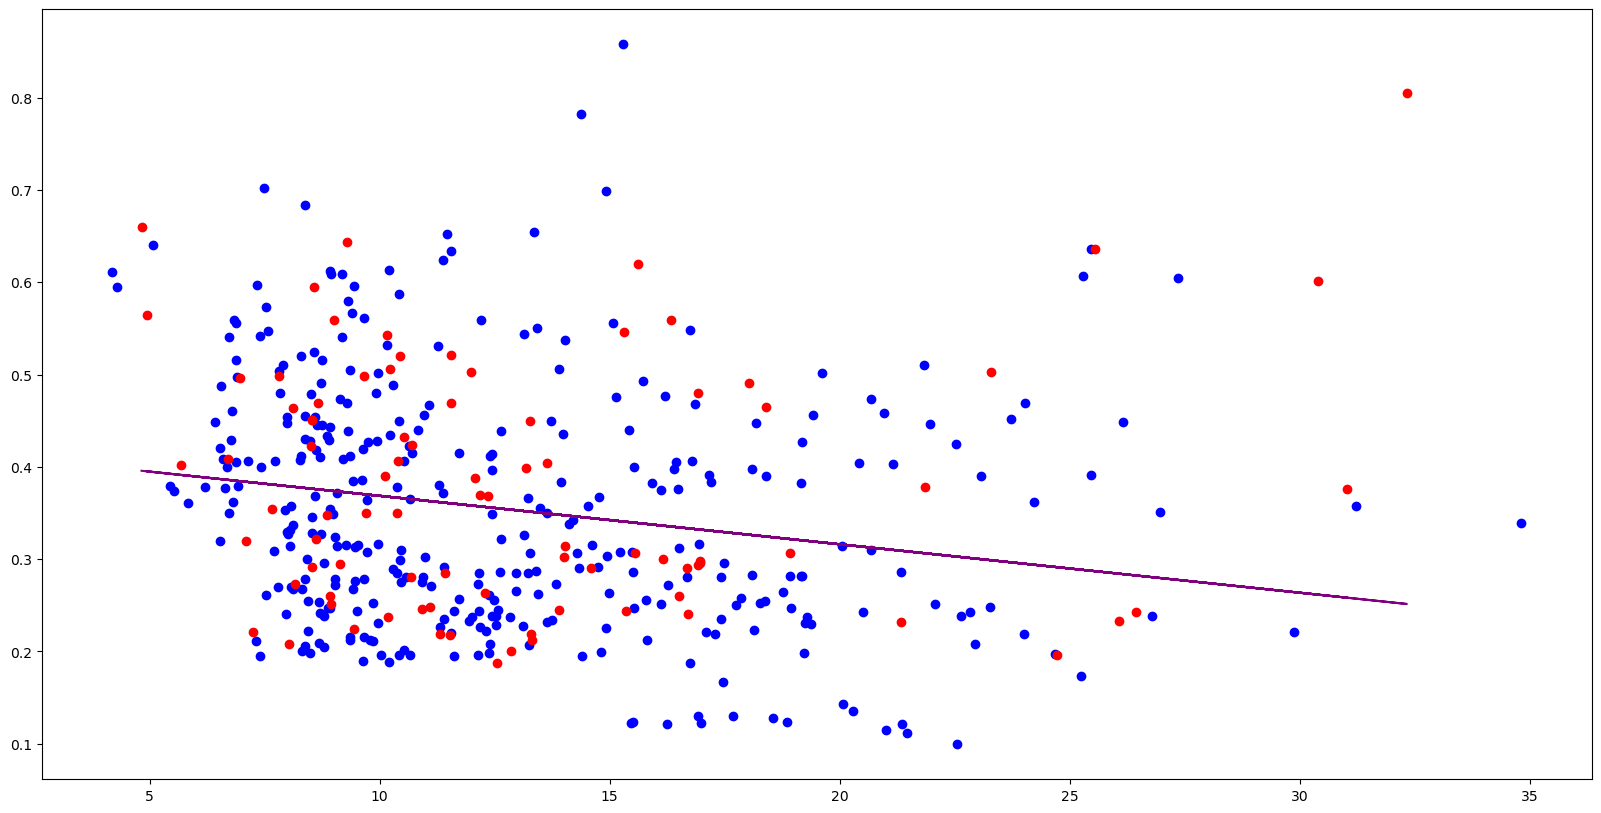

In [29]:
plt.scatter(crimex_train, crimey_train, c="b")
plt.scatter(crimex_test, crimey_test, c="r")
plt.plot(crimex_test, crime_linear.predict(crimex_test.reshape(-1,1)), c="purple")
# welfare_povcap is the amount of dollars a state spends on welfare (including medicaid) per state resident in poverty
# violent_rate is the number of violent crimes in a single year over state population

In [30]:
#Training Error (MSE, MAE)
(
    metrics.mean_squared_error(crimey_train, crime_linear.predict(crimex_train.reshape(-1,1))),
    metrics.mean_absolute_error(crimey_train, crime_linear.predict(crimex_train.reshape(-1,1)))
)

(0.016738983568976403, 0.10619273291473316)

In [31]:
#Testing Error (MSE, MAE)
(
    metrics.mean_squared_error(crimey_test, crime_linear.predict(crimex_test.reshape(-1,1))),
    metrics.mean_absolute_error(crimey_test, crime_linear.predict(crimex_test.reshape(-1,1)))
)

(0.019886768837576625, 0.1113128582597789)

## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 

In [97]:
resume = pd.read_csv("../data/resume.csv",index_col=False)
resume = resume[resume["resume_quality"] == "high"]
non_numeric_columns = ['job_ad_id', 'job_city', 'job_industry', 'job_type', 'job_fed_contractor', 'job_ownership', 
                       'resume_quality','job_req_min_experience', 'job_req_school', 'firstname', 'race', 'gender']
resume = resume.copy().drop(non_numeric_columns, axis=1)
resume

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
1,1,1,0,0,1,0,0,3,0,0,1,6,1,0,1,1,0,1
3,1,1,0,0,1,0,0,3,0,0,0,6,1,1,1,0,1,1
4,1,1,0,0,1,1,0,3,0,0,1,22,1,0,0,0,0,1
6,1,0,0,0,0,0,0,4,1,0,1,5,1,1,1,0,0,1
7,1,1,0,0,1,1,0,3,0,0,0,21,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,0,1,0,0,0,0,0,4,1,0,1,8,1,0,1,0,0,1
4863,0,1,0,0,1,0,0,2,0,0,0,16,1,1,0,0,1,1
4864,0,1,0,0,1,0,0,3,0,1,1,26,1,1,1,0,1,1
4867,0,0,0,0,0,0,0,4,1,0,1,8,1,0,1,0,0,1


In [54]:
resx_train, resx_test, resy_train, resy_test = train_test_split(resume.drop(['received_callback'], axis=1),resume.received_callback, test_size=.20)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, auc, roc_curve)

In [56]:
res_model = DecisionTreeClassifier(criterion='entropy')
res_model.fit(resx_train,resy_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
predict_test = res_model.predict(resx_test)
predict_train = res_model.predict(resx_train)

In [60]:
#Accuracy
accuracy_score(resy_test, predict_test)

0.9

In [61]:
#Confusion Matrix
confusion_matrix(resy_test, predict_test)

array([[438,  16],
       [ 33,   3]], dtype=int64)

In [63]:
#Classifcation Report
print(classification_report(resy_test, predict_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       454
           1       0.16      0.08      0.11        36

    accuracy                           0.90       490
   macro avg       0.54      0.52      0.53       490
weighted avg       0.87      0.90      0.89       490



## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [598]:
# there doesn't seem to be much of a benefit to dropping any columns (though admittedly I did not try every combination)
drop_columns = [
                'has_email_address','honors','volunteer','military'
                ]
resume_new = resume.copy().drop(drop_columns, axis=1)
resume_new

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,worked_during_school,years_experience,computer_skills,special_skills,employment_holes
1,1,1,0,0,1,0,0,3,0,1,6,1,0,0
3,1,1,0,0,1,0,0,3,0,0,6,1,1,1
4,1,1,0,0,1,1,0,3,0,1,22,1,0,0
6,1,0,0,0,0,0,0,4,1,1,5,1,1,0
7,1,1,0,0,1,1,0,3,0,0,21,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,0,1,0,0,0,0,0,4,1,1,8,1,0,0
4863,0,1,0,0,1,0,0,2,0,0,16,1,1,1
4864,0,1,0,0,1,0,0,3,0,1,26,1,1,1
4867,0,0,0,0,0,0,0,4,1,1,8,1,0,0


In [599]:
newx_train, newx_test, newy_train, newy_test = train_test_split(resume_new.drop(['received_callback'], axis=1),resume_new.received_callback, test_size=.20)

In [600]:
new_model = DecisionTreeClassifier(criterion='entropy')
new_model.fit(newx_train,newy_train)

DecisionTreeClassifier(criterion='entropy')

In [601]:
predict_new = new_model.predict(newx_test)

In [602]:
#Accuracy
accuracy_score(newy_test, predict_new)

0.8979591836734694

In [603]:
#Confusion Matrix
confusion_matrix(newy_test, predict_new)

array([[438,  13],
       [ 37,   2]], dtype=int64)

In [604]:
#Classifcation Report
print(classification_report(newy_test, predict_new))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       451
           1       0.13      0.05      0.07        39

    accuracy                           0.90       490
   macro avg       0.53      0.51      0.51       490
weighted avg       0.86      0.90      0.88       490

